In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

In [ ]:
# Load the Sleep Efficiency dataset
sleep_df = pd.read_csv('/content/drive/MyDrive/Data Science-Regression- Sleep Efficiency/Sleep_Efficiency.csv')

In [ ]:
sleep_df.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [ ]:
sleep_df.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,40.829897,7.451031,0.789253,22.680412,52.822165,24.497423,1.618557,22.680412,1.146907,1.757732
std,13.403187,0.883483,0.135706,3.430510,15.571518,15.309638,1.355958,28.997566,1.612793,1.447824
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.700000,20.000000,51.000000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,41.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,0.000000,0.000000,2.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,24.000000,3.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [ ]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     388 non-null    int64  
 1   Gender                  388 non-null    object 
 2   Bedtime                 388 non-null    object 
 3   Wakeup time             388 non-null    object 
 4   Sleep duration          388 non-null    float64
 5   Sleep efficiency        388 non-null    float64
 6   REM sleep percentage    388 non-null    int64  
 7   Deep sleep percentage   388 non-null    int64  
 8   Light sleep percentage  388 non-null    int64  
 9   Awakenings              388 non-null    float64
 10  Caffeine consumption    388 non-null    float64
 11  Alcohol consumption     388 non-null    float64
 12  Smoking status          388 non-null    object 
 13  Exercise frequency      388 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory 

**Checking missing values**

In [ ]:
# Drop the ID column
sleep_df.drop(columns=['ID'], inplace=True)


In [ ]:
# Drop rows with missing values
sleep_df.dropna(inplace=True)

In [ ]:
# Print the number of missing values in each column
print(sleep_df.isnull().sum())

Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64


**Encode categorical variables**

In [ ]:
# Encode categorical variables
le = LabelEncoder()
sleep_df['Gender'] = le.fit_transform(sleep_df['Gender'])
sleep_df['Smoking status'] = le.fit_transform(sleep_df['Smoking status'])

In [ ]:
# Scale the numerical features
features = ['Age', 'Gender', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
            'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
            'Alcohol consumption', 'Smoking status', 'Exercise frequency']
scaler = StandardScaler()
sleep_df[features] = scaler.fit_transform(sleep_df[features])

In [ ]:
# Scale the numerical features
scaler = StandardScaler()
sleep_df[features] = scaler.fit_transform(sleep_df[features])


**Analyze relationships between features**

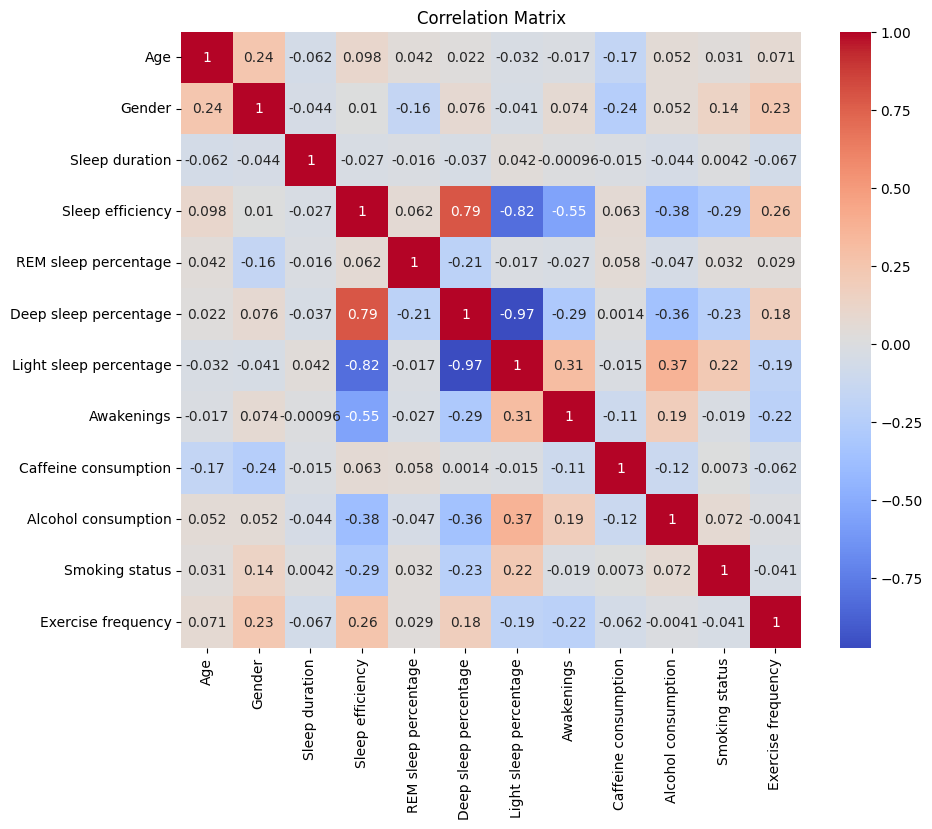

In [ ]:
# Analyze relationships between features
plt.figure(figsize=(10,8))
sns.heatmap(sleep_df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Outliers**

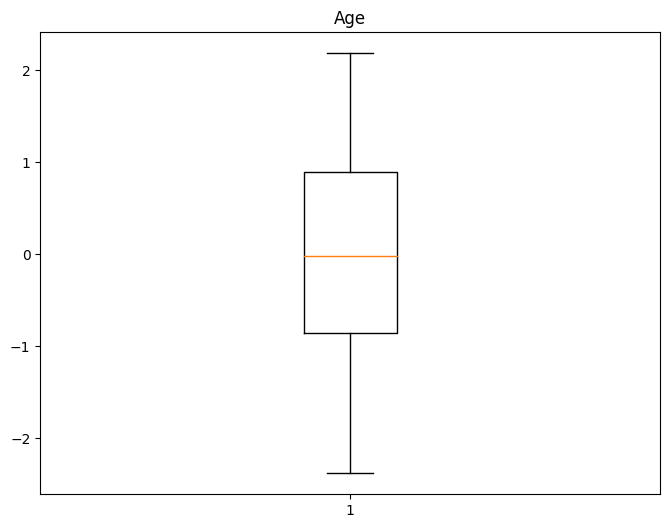

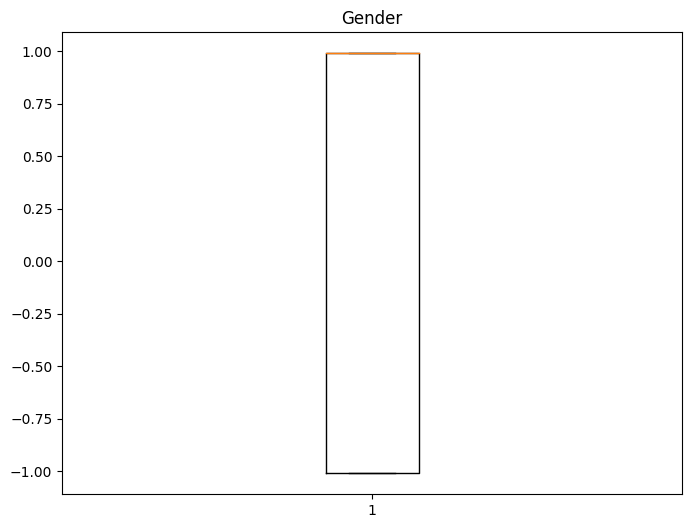

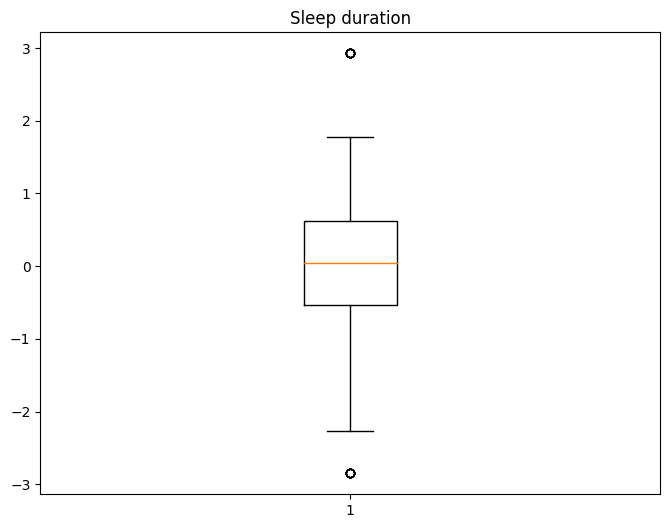

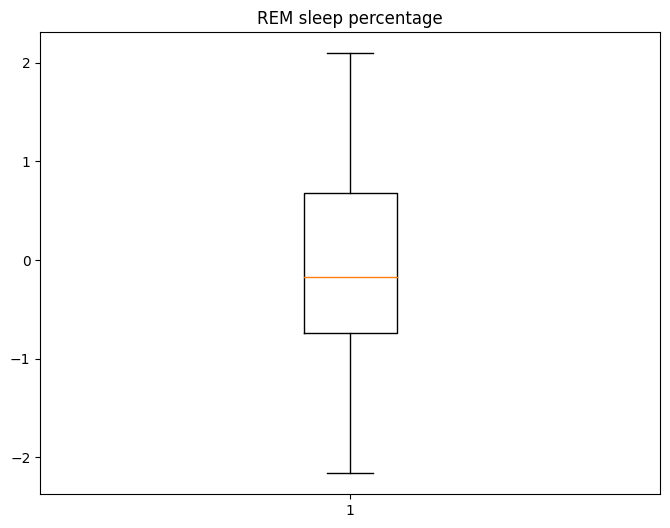

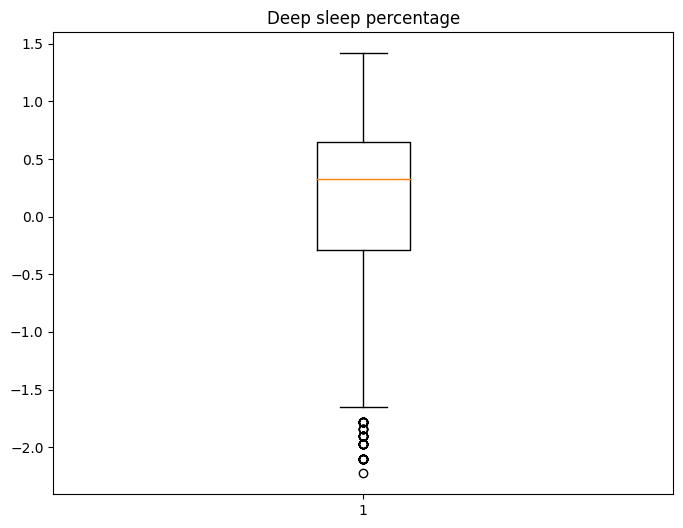

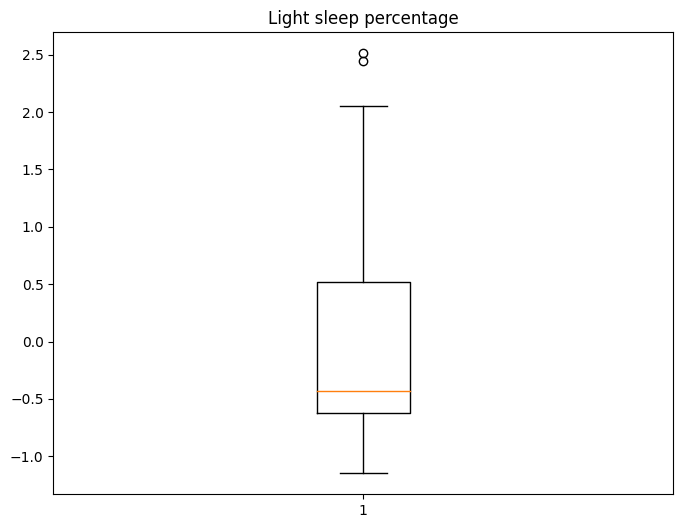

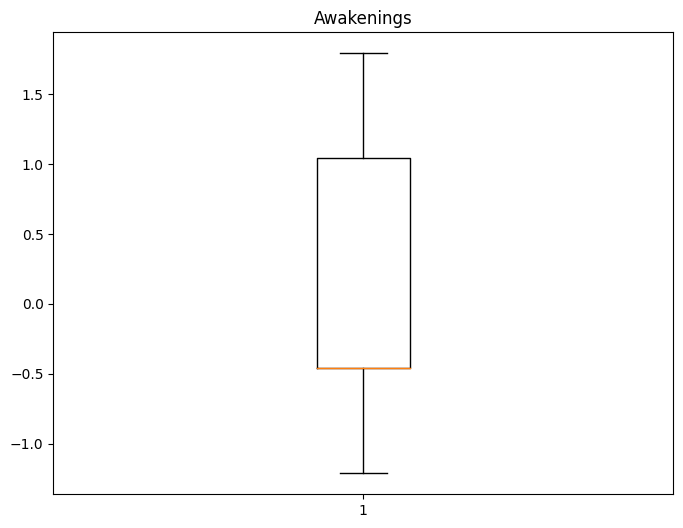

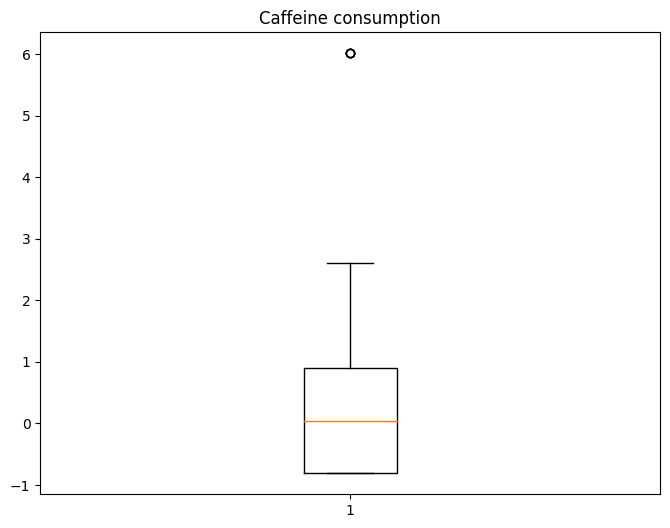

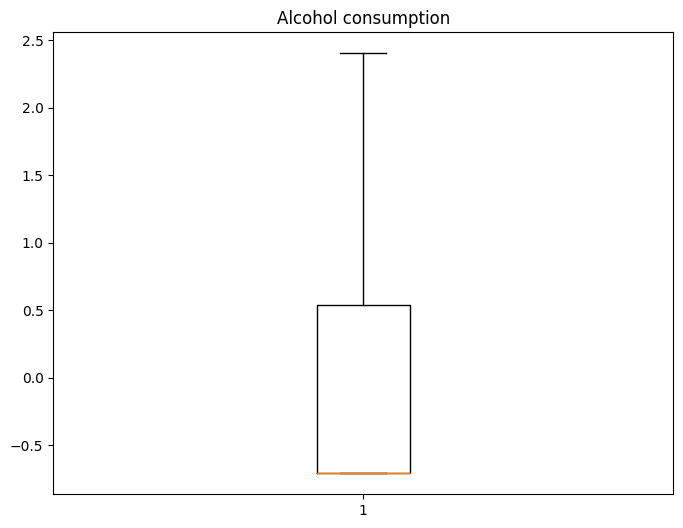

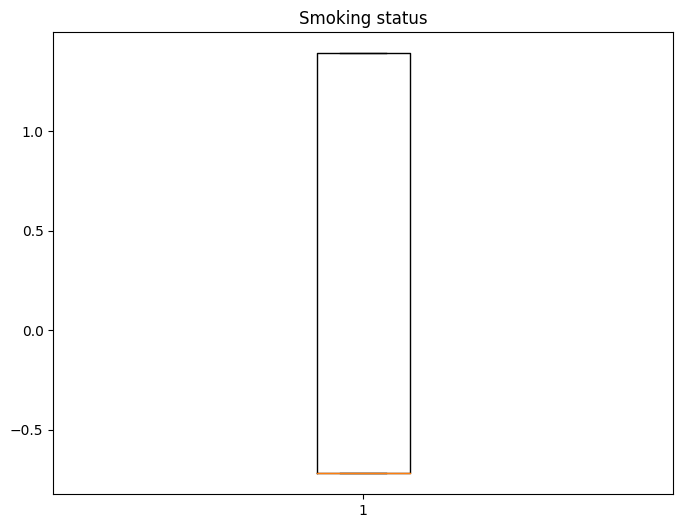

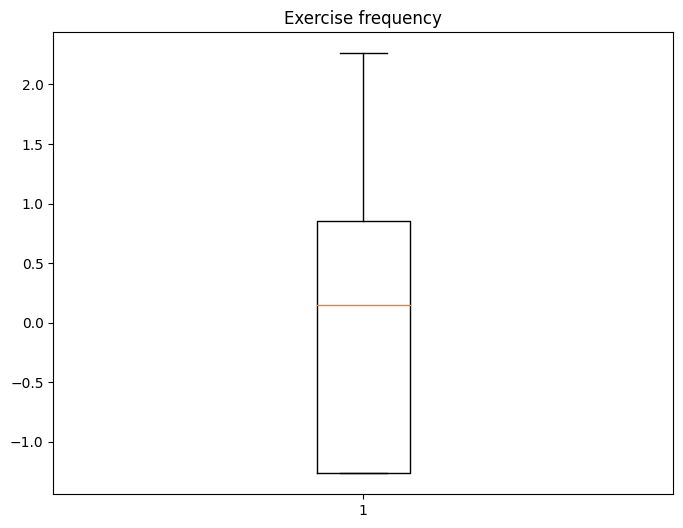

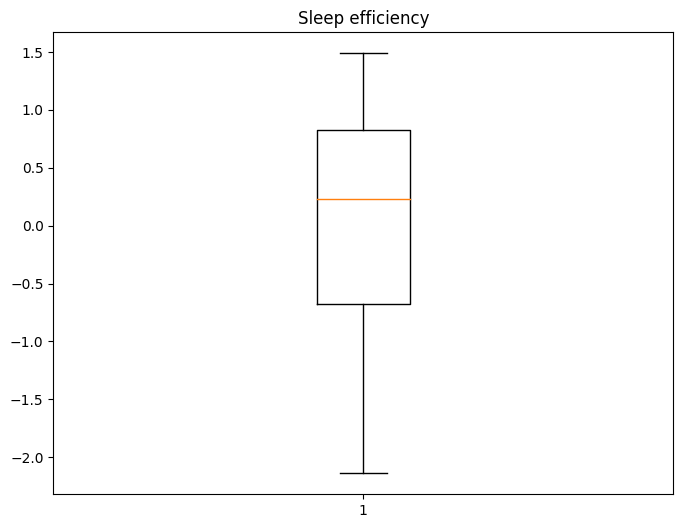

In [ ]:
# Select a subset of relevant features
features = ['Age', 'Gender', 'Sleep duration', 'REM sleep percentage',
            'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
            'Alcohol consumption', 'Smoking status', 'Exercise frequency', 'Sleep efficiency']
# Plot box plots for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(sleep_df[feature])
    plt.title(feature)
    plt.show()

In [ ]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, features):
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]

# Remove outliers from the dataset
sleep_df = remove_outliers(sleep_df, features)

# Print the new dataset size
print('New dataset size:', len(sleep_df))

New dataset size: 374


In [ ]:
# Perform PCA
pca = PCA(n_components=len(features))
pca.fit(sleep_df[features])
pca_variance = pd.Series(pca.explained_variance_ratio_, index=['PC'+str(i) for i in range(1, len(features)+1)])
print("PCA Variance:\n", pca_variance)

PCA Variance:
 PC1     2.755038e-01
PC2     1.338105e-01
PC3     9.872588e-02
PC4     8.666882e-02
PC5     8.356213e-02
PC6     7.795957e-02
PC7     6.798445e-02
PC8     6.357126e-02
PC9     5.600558e-02
PC10    4.461347e-02
PC11    1.159453e-02
PC12    5.573282e-34
dtype: float64


In [ ]:
# Split the data into train and test sets
X = sleep_df[features]
y = sleep_df['Sleep efficiency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train/Test Split:", len(X_train), len(X_test))

Train/Test Split: 361 91


**Model Training**

**Linear Regression**

In [ ]:
# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the model
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)



R-squared: 1.0
Mean Squared Error: 9.38417864097662e-31
Root Mean Squared Error: 9.687197035766651e-16


**XGB Regressor**

In [ ]:
# Train an XGBoost regression model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.9997625874891474
Mean Squared Error: 0.00024221917328944527
Root Mean Squared Error: 0.015563392088148562


**RandomForest Regressor**

In [ ]:
# Fit a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.9996542882753628
Mean Squared Error: 0.00035271101694407393
Root Mean Squared Error: 0.01878060214540721


**Compare the results**

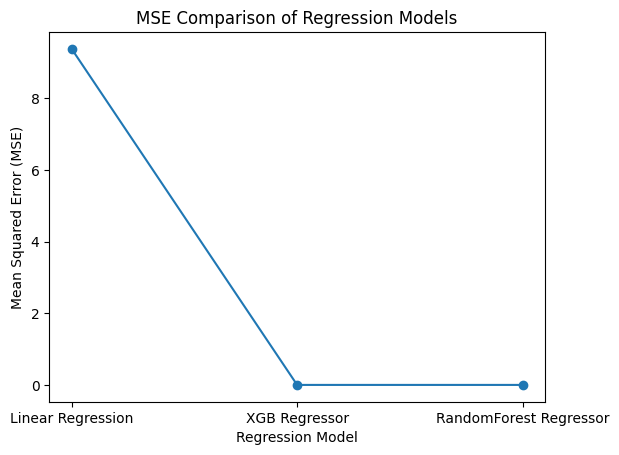

In [ ]:
import matplotlib.pyplot as plt

# Define the data
model_names = ['Linear Regression', 'XGB Regressor', 'RandomForest Regressor']
MSE_values = [9.38, 0.000242, 0.00035]

# Create a linear plot of the MSE values
plt.plot(model_names, MSE_values, marker='o')
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison of Regression Models')
plt.show()